In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [75]:
a = pd.read_csv(r'C:\Users\Krish\Downloads\Housing.csv')
boston = pd.DataFrame(a)

In [76]:
boston

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [77]:
# checking for any null values

boston.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [78]:
boston.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [79]:
print(boston.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [80]:
# Select only numeric columns for correlation calculation
numeric_boston = boston.select_dtypes(include=[float, int])

# Alternatively, convert non-numeric columns to numeric and handle errors
for col in boston.columns:
    boston[col] = pd.to_numeric(boston[col], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = numeric_boston.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
               price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


Correlation Matrix:
                      price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712       NaN   
area              0.535997  1.000000  0.151858   0.193820  0.083996       NaN   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564       NaN   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165       NaN   
stories           0.420712  0.083996  0.408564   0.326165  1.000000       NaN   
mainroad               NaN       NaN       NaN        NaN       NaN       NaN   
guestroom              NaN       NaN       NaN        NaN       NaN       NaN   
basement               NaN       NaN       NaN        NaN       NaN       NaN   
hotwaterheating        NaN       NaN       NaN        NaN       NaN       NaN   
airconditioning        NaN       NaN       NaN        NaN       NaN       NaN   
parking           0.384394  0.352980  0.139270   0.177496  0.045547       NaN   
prefare

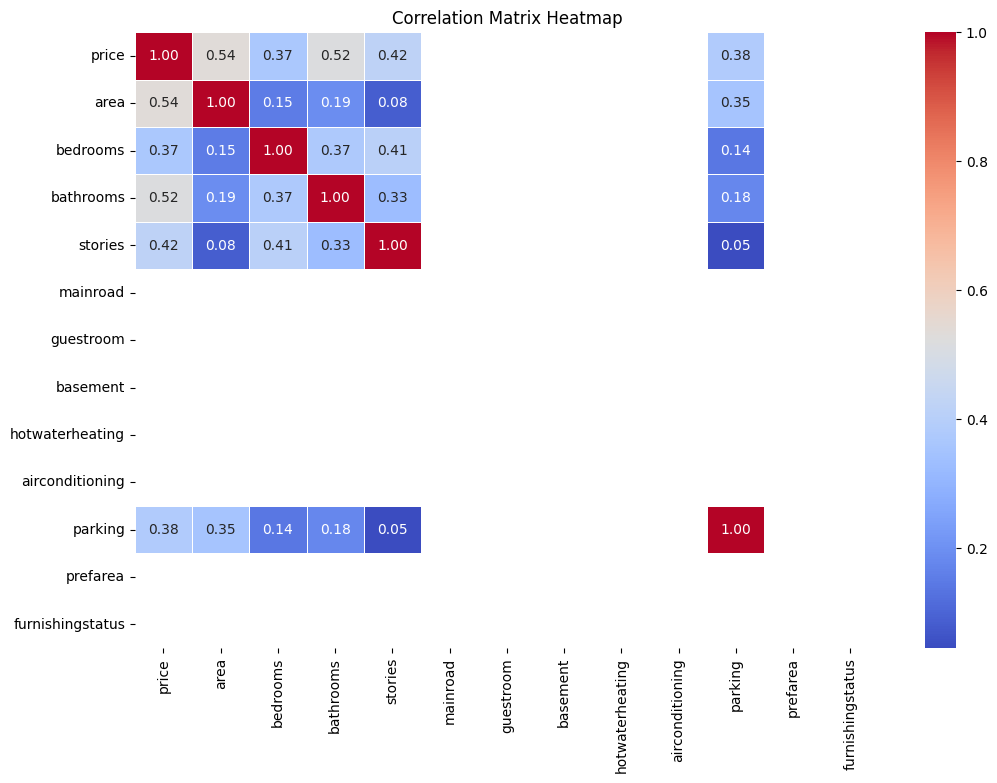

Strong Correlations:
                   price  area  bedrooms  bathrooms  stories  mainroad  \
price               1.0   NaN       NaN        NaN      NaN       NaN   
area                NaN   1.0       NaN        NaN      NaN       NaN   
bedrooms            NaN   NaN       1.0        NaN      NaN       NaN   
bathrooms           NaN   NaN       NaN        1.0      NaN       NaN   
stories             NaN   NaN       NaN        NaN      1.0       NaN   
mainroad            NaN   NaN       NaN        NaN      NaN       NaN   
guestroom           NaN   NaN       NaN        NaN      NaN       NaN   
basement            NaN   NaN       NaN        NaN      NaN       NaN   
hotwaterheating     NaN   NaN       NaN        NaN      NaN       NaN   
airconditioning     NaN   NaN       NaN        NaN      NaN       NaN   
parking             NaN   NaN       NaN        NaN      NaN       NaN   
prefarea            NaN   NaN       NaN        NaN      NaN       NaN   
furnishingstatus    NaN   NaN

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded as 'boston')
# boston = pd.read_csv('path_to_boston_dataset.csv')

# Calculate the correlation matrix
correlation_matrix = boston.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify and display strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
filtered_strong_correlations = strong_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1)

print("Strong Correlations:\n", strong_correlations)
print("Filtered Strong Correlations:\n", filtered_strong_correlations)


In [82]:
# Here we are looking at correlation to better understand our dataset.
# We have 2 types of correlation. Positive and negative.

correlation_matrix = boston.corr()

<Axes: >

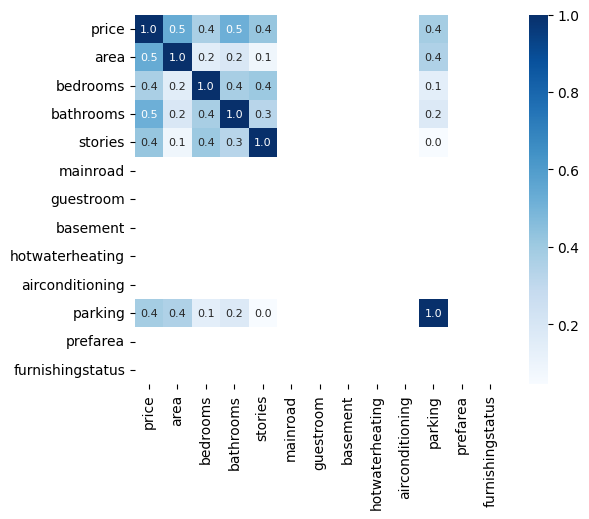

In [83]:
# We look at correlation using heatmaps

sns.heatmap(correlation_matrix, cbar=True, square=True, annot=True, annot_kws={'size':8}, fmt='.1f', cmap='Blues')

# Now we can see LSTAT and Price. LSTAT meaning Lower Financial Status living in that particular area.
# We can see Price and LSTAT are negatively correlated.

In [84]:
X = a.drop(columns='price')

In [85]:
Y = a['price']

In [86]:
Y = a['price']

In [87]:
import pandas as pd

# Load the dataset (assuming it's a CSV file)
boston = pd.read_csv(r'C:\Users\Krish\Downloads\Housing.csv')

# Print column names to identify the target column
print("Column Names:\n", boston.columns)


Column Names:
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's a CSV file)
#boston = import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's a CSV file)
boston = pd.read_csv(r'C:\Users\Krish\Downloads\Housing.csv')

# Print column names to identify the target column
print("Column Names:\n", boston.columns)


target_column = 'price'  # Adjust this to your actual target column name
if target_column in boston.columns:
    # Split the dataset into features (X) and target (y)
    X = boston.drop(target_column, axis=1)  # Features
    y = boston[target_column]               # Target variable
else:
    raise KeyError(f"The target column '{target_column}' is not found in the dataset.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Column Names:
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [90]:
# Print column names
print(boston.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [91]:
print(X.shape, X_train.shape, X_test.shape)

(545, 12) (436, 12) (109, 12)


In [92]:
model = XGBRegressor()

In [93]:
# Print data types of each column
print(X_train.dtypes)

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's a CSV file)
boston = pd.read_csv(r'C:\Users\Krish\Downloads\Housing.csv')

# Print column names to identify the target column
print("Column Names:\n", boston.columns)

# Assuming 'PRICE' is the target column based on previous discussion
target_column = 'price'

# Check if the identified target column exists in the DataFrame
if target_column in boston.columns:
    # Split the dataset into features (X) and target (y)
    X = boston.drop(target_column, axis=1)  # Features
    y = boston[target_column]               # Target variable
else:
    raise KeyError(f"The target column '{target_column}' is not found in the dataset.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the training and testing data (to ensure they have the same columns)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Print the shapes of the datasets
print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Column Names:
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
X shape: (545, 12)
X_train shape: (436, 20)
X_test shape: (109, 20)
y_train shape: (436,)
y_test shape: (109,)


In [95]:
from xgboost import XGBRegressor

# Initialize the model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions (optional)
y_pred = model.predict(X_test)


In [96]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
from xgboost import XGBRegressor

# Initialize the model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions (optional)
y_pred = model.predict(X_test)


In [98]:
X_train_prediction = model.predict(X_train)

r_squared = metrics.r2_score(X_train_prediction, Y_train)
mean_absolute = metrics.mean_absolute_error(X_train_prediction, Y_train)

print(r_squared)
print(mean_absolute)

-1.2882161694077388
1977669.3340022936


Text(0.5, 1.0, 'X-train-prediction')

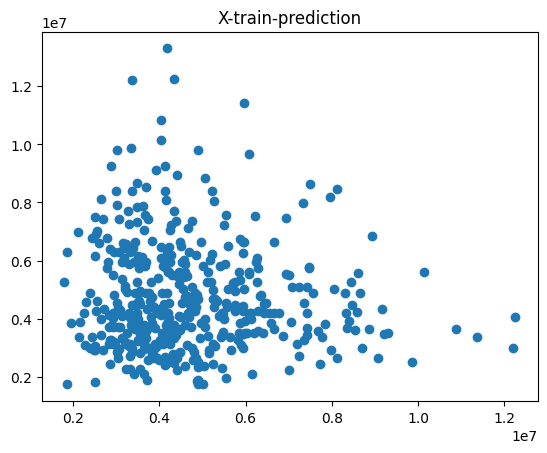

In [99]:
plt.scatter(X_train_prediction, Y_train)
plt.title('X-train-prediction')

Text(0.5, 1.0, 'X-test-prediction')

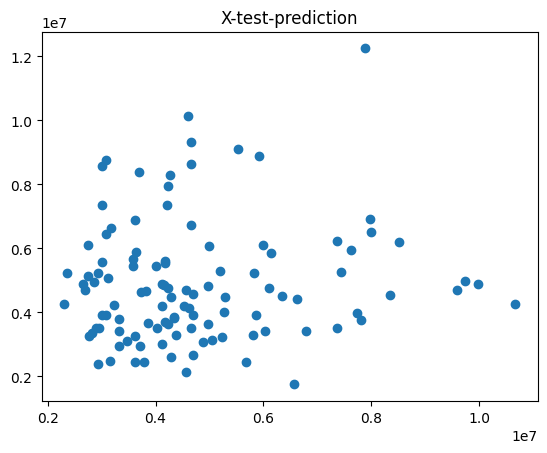

In [100]:
plt.scatter(y_pred, Y_test)
plt.title('X-test-prediction')